In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from operator import itemgetter
import community as community_louvain

def load_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

def load_graph(graphml_path):
    if os.path.exists(graphml_path):
        return nx.read_graphml(graphml_path)
    else:
        print(f"Error: File not found at {graphml_path}")
        return None

file_path = 'C:/Users/李世琦/urban_sim/london_flows.csv'
graphml_path = 'C:/Users/李世琦/urban_sim/london.graph'

london_network_data = load_data(file_path)
G_london_network = load_graph(graphml_path)

In [2]:
# Assuming G_london_network is the loaded GraphML graph
if G_london_network is not None:
    # Print the data of the first few nodes to see available attributes
    node_data_examples = list(G_london_network.nodes(data=True))[:5]
    print(node_data_examples)


[('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'}), ('Kingsbury', {'coords': '(519359.9688603217, 188721.22027255083)'}), ('Queensbury', {'coords': '(518811.3613368616, 189760.50737704366)'}), ('Canons Park', {'coords': '(518183.29968291725, 191257.26260848)'}), ('Stanmore', {'coords': '(517580.4596464033, 192537.99948098673)'})]


In [3]:
if G_london_network is not None and london_network_data is not None:
    print(list(G_london_network.nodes(data=True))[0])

    degree_centrality = nx.degree_centrality(G_london_network)
    closeness_centrality = nx.closeness_centrality(G_london_network)
    betweenness_centrality = nx.betweenness_centrality(G_london_network)

    def get_top_10(centrality_dict):
        # Sort nodes based on centrality and select the top 10
        sorted_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        # Use the node name directly as the station name
        return [(node, centrality) for node, centrality in sorted_nodes]

    top_10_degree = get_top_10(degree_centrality)
    top_10_closeness = get_top_10(closeness_centrality)
    top_10_betweenness = get_top_10(betweenness_centrality)

    df_degree = pd.DataFrame(top_10_degree, columns=['Station', 'Degree Centrality'])
    df_closeness = pd.DataFrame(top_10_closeness, columns=['Station', 'Closeness Centrality'])
    df_betweenness = pd.DataFrame(top_10_betweenness, columns=['Station', 'Betweenness Centrality'])

    print(df_degree)
    print(df_closeness)
    print(df_betweenness)


('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})
                    Station  Degree Centrality
0                 Stratford             0.0225
1         Bank and Monument             0.0200
2              Baker Street             0.0175
3  King's Cross St. Pancras             0.0175
4                  West Ham             0.0150
5              Canning Town             0.0150
6                  Waterloo             0.0150
7                Green Park             0.0150
8             Oxford Circus             0.0150
9          Liverpool Street             0.0150
                    Station  Closeness Centrality
0                Green Park              0.114778
1         Bank and Monument              0.113572
2  King's Cross St. Pancras              0.113443
3               Westminster              0.112549
4                  Waterloo              0.112265
5             Oxford Circus              0.111204
6               Bond Street              0.110988
7          

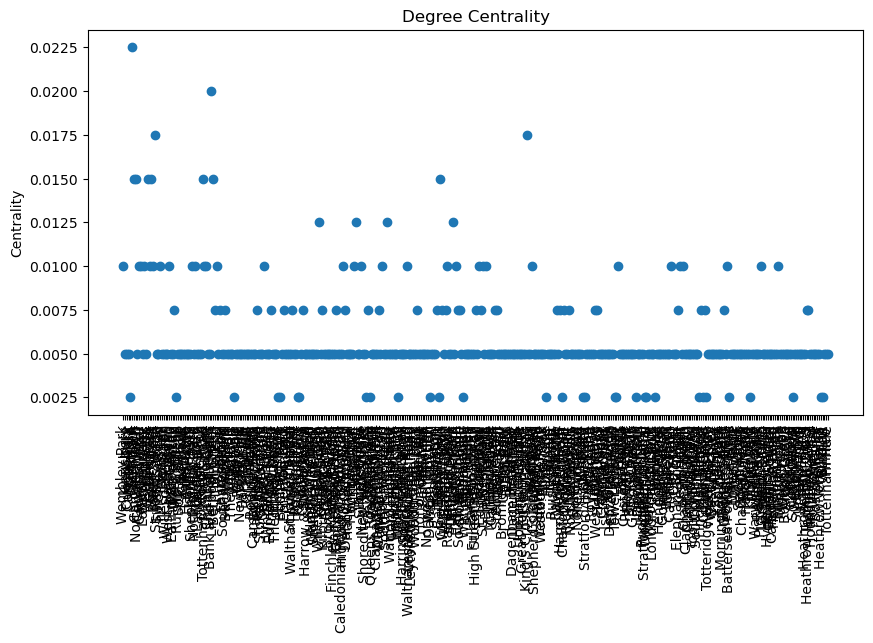

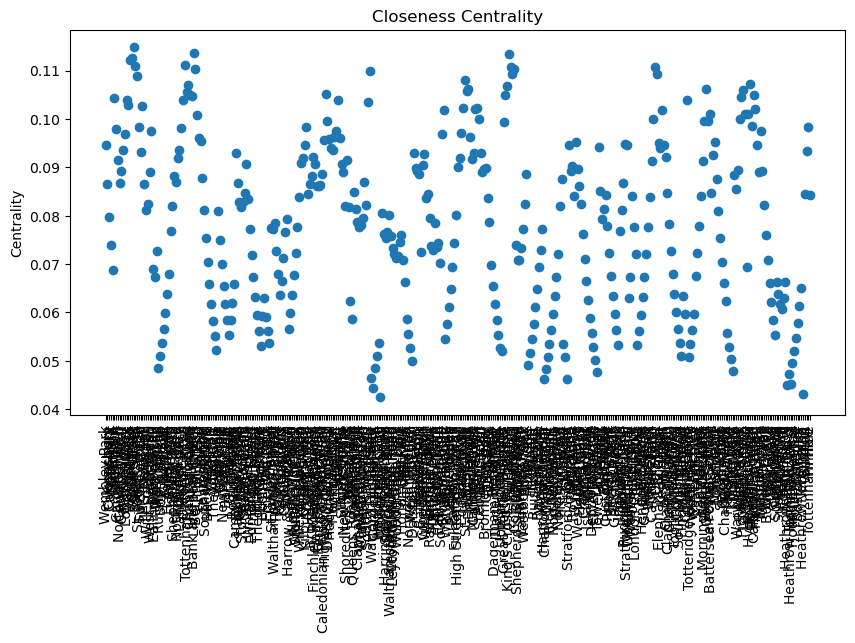

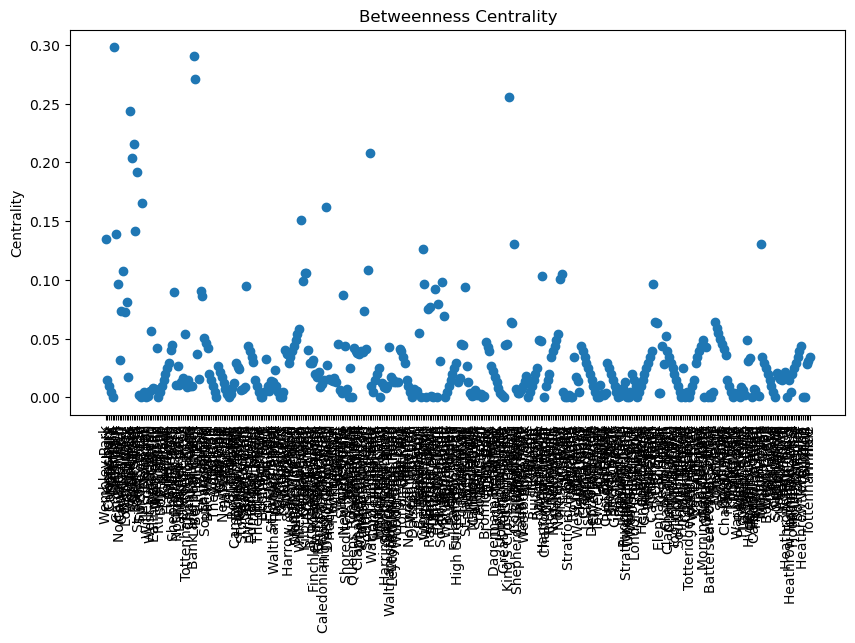

In [4]:
    #  Visualize centrality measures
    def plot_centrality(centrality, title):
        plt.figure(figsize=(10, 5))
        plt.scatter(range(len(centrality)), list(centrality.values()))
        plt.xticks(range(len(centrality)), list(centrality.keys()), rotation=90)
        plt.title(title)
        plt.ylabel('Centrality')
        plt.show()

    plot_centrality(degree_centrality, "Degree Centrality")
    plot_centrality(closeness_centrality, "Closeness Centrality")
    plot_centrality(betweenness_centrality, "Betweenness Centrality")

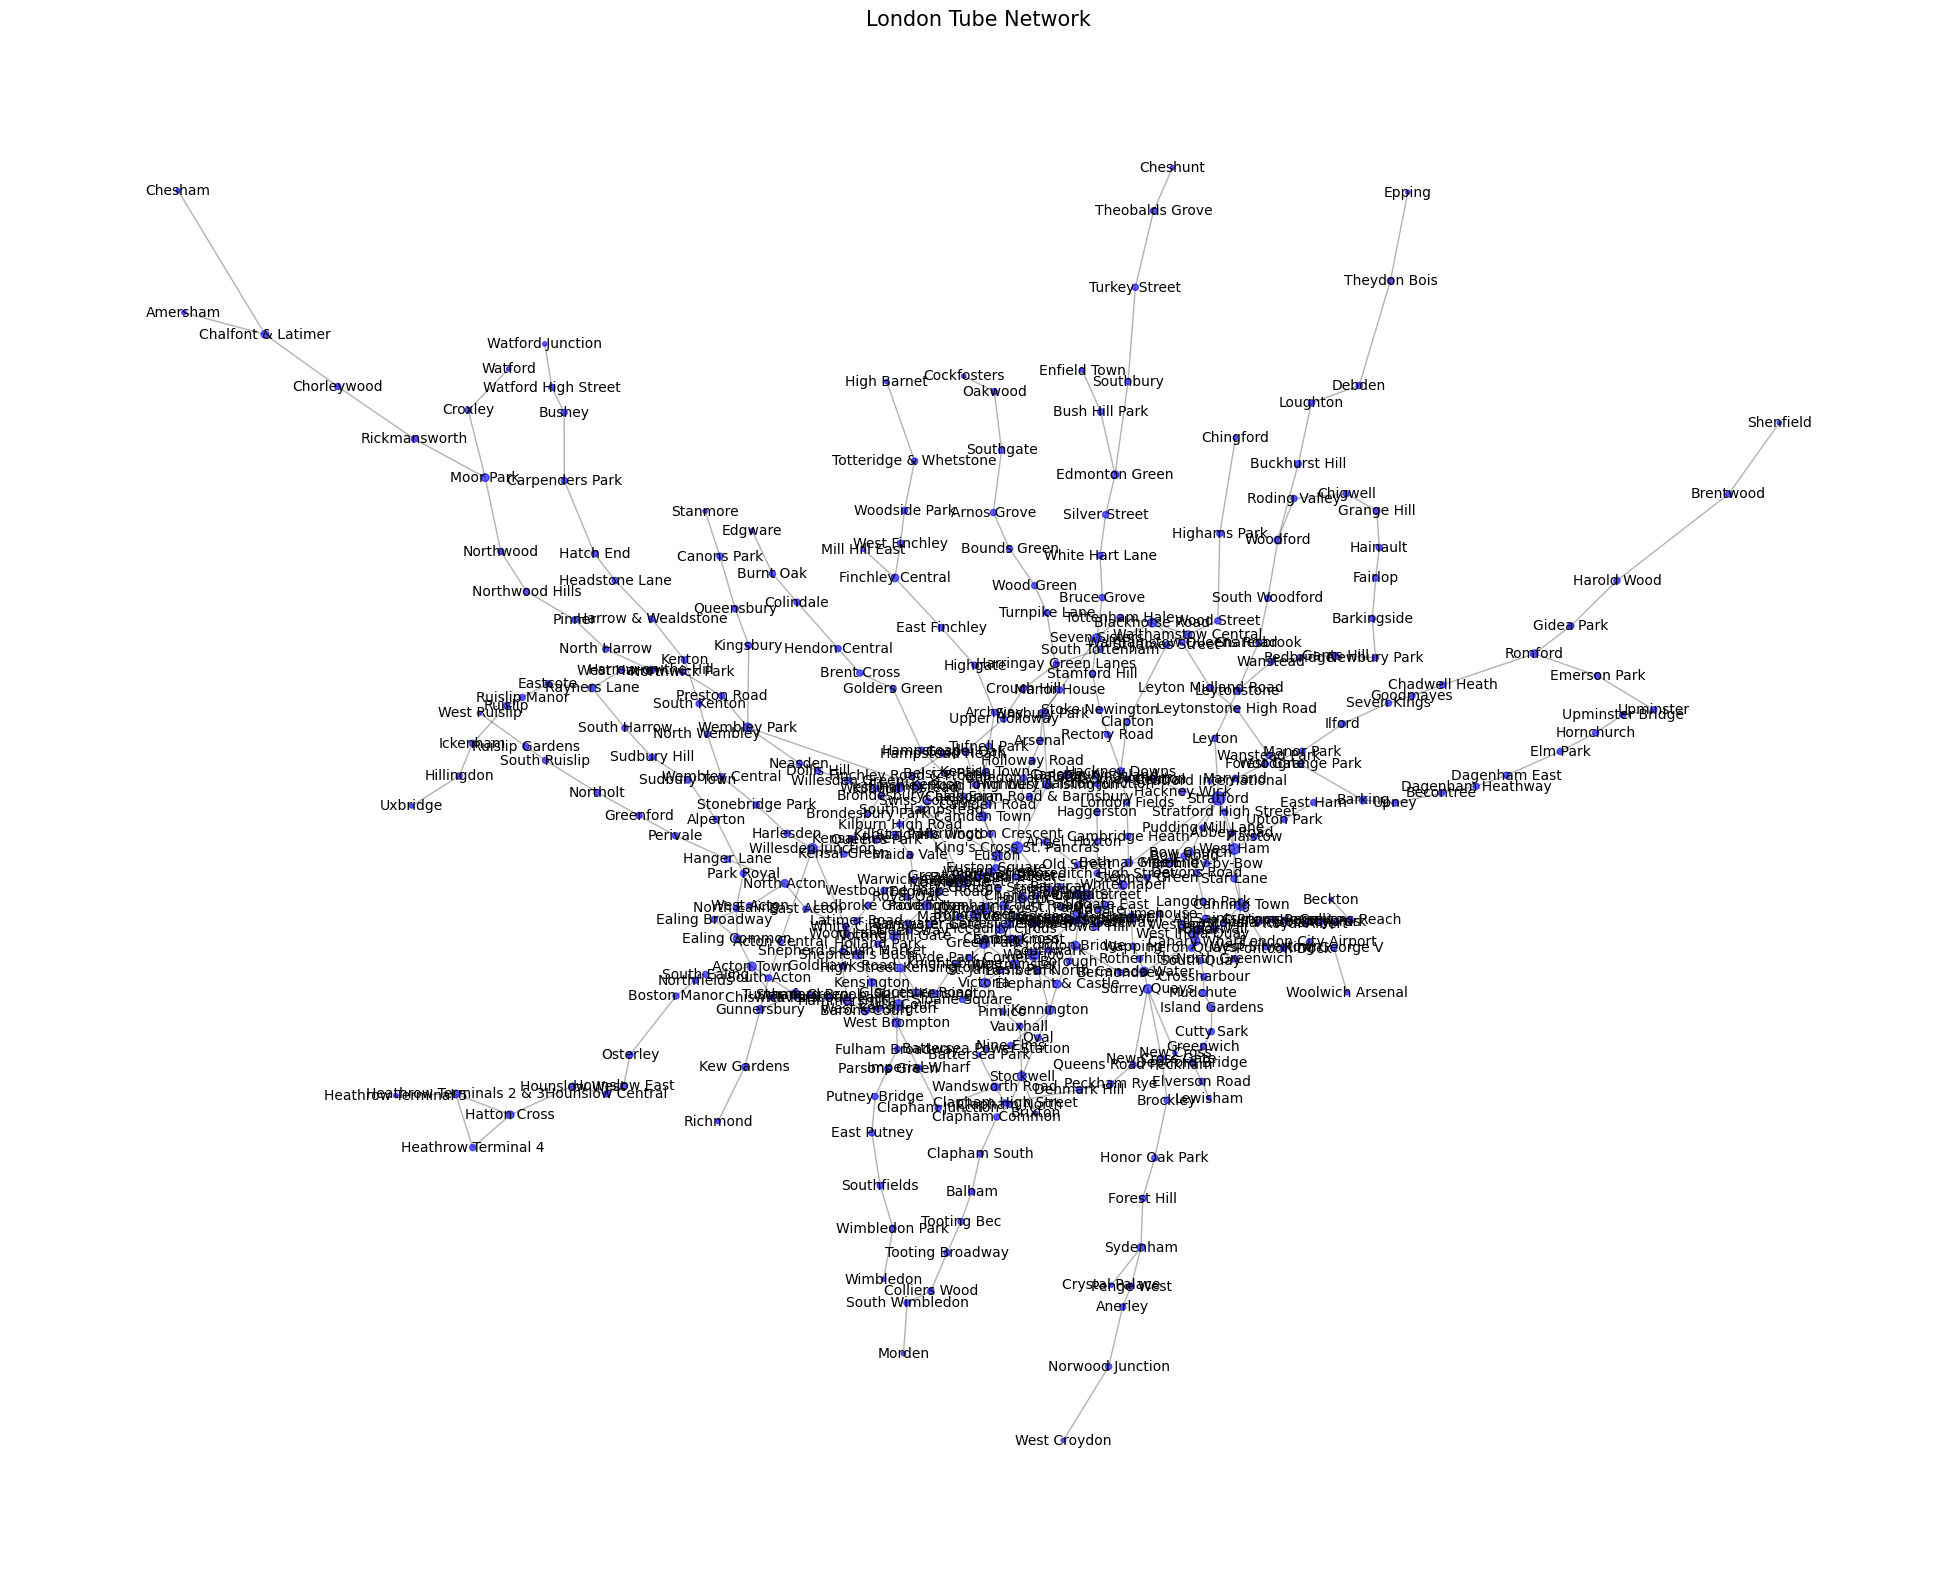

In [5]:
import ast
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph_with_names(graph):
    plt.figure(figsize=(25, 20))

    # Get node coordinates and ensure they are tuples
    pos = nx.get_node_attributes(graph, 'coords')
    # Confirm coord format and convert if necessary
    pos = {node: ast.literal_eval(coord) if isinstance(coord, str) else coord for node, coord in pos.items()}

    # Calculate node sizes based on their degree
    node_sizes = [10 * graph.degree(n) for n in graph]

    # Use node IDs directly as labels since there is no 'station_name' attribute
    labels = {n: n for n in graph.nodes()}

    # Draw the network graph with nodes, edges, and labels
    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=10, font_color='black')

    plt.title("London Tube Network", fontsize=15)
    plt.axis('off')
    plt.show()

# Attempt to draw the graph with the improved function
draw_graph_with_names(G_london_network)



In [6]:
## 1.3  Node removal

# 将中心性字典中的元素按中心性值降序排序，并取前10项
def get_top_10_corrected(centrality_dict, G, centrality_type):
    sorted_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    # 返回节点标识符和中心性类型
    return [(node, centrality, centrality_type) for node, centrality in sorted_nodes]

# 获取三种中心性度量的前10节点，并传入中心性类型标识
top_10_degree = get_top_10_corrected(degree_centrality, G_london_network, 'Degree Centrality')
top_10_closeness = get_top_10_corrected(closeness_centrality, G_london_network, 'Closeness Centrality')
top_10_betweenness = get_top_10_corrected(betweenness_centrality, G_london_network, 'Betweenness Centrality')

#计算给定网络的全局效率，使用 NetworkX 的 global_efficiency 函数
def calculate_global_efficiency(network):
    return nx.global_efficiency(network)

#计算全局集聚系数
def calculate_transitivity(network):
    # 计算并返回全局集群系数，基于三角形的传递性
    return nx.transitivity(network)

# Calculate the initial global efficiency and transitivity of the network
initial_efficiency = calculate_global_efficiency(G_london_network)
initial_transitivity = calculate_transitivity(G_london_network)

print("Initial Global Efficiency:", initial_efficiency)
print("Initial Transitivity:", initial_transitivity)

# Function to remove nodes and calculate new metrics
def remove_nodes_and_calculate_metrics(graph, nodes_to_remove):
    # Create a copy of the graph so we don't alter the original
    G_modified = graph.copy()
    # Remove nodes
    G_modified.remove_nodes_from([node for node, _, _ in nodes_to_remove])
    # Calculate new global efficiency and transitivit
    new_efficiency = calculate_global_efficiency(G_modified)
    new_transitivity = calculate_transitivity(G_modified)
    return new_efficiency, new_transitivity
    
# Remove top 10 nodes based on Degree Centrality and recalculate metrics
new_efficiency, new_transitivity = remove_nodes_and_calculate_metrics(G_london_network, top_10_degree)
print("New Global Efficiency after removing top 10 Degree Centrality nodes:", new_efficiency)
print("New Transitivity after removing top 10 Degree Centrality nodes:", new_transitivity)

Initial Global Efficiency: 0.1012561935972123
Initial Transitivity: 0.050119331742243436
New Global Efficiency after removing top 10 Degree Centrality nodes: 0.06373592086177943
New Transitivity after removing top 10 Degree Centrality nodes: 0.043557168784029036


In [7]:
## Part A：Non-sequential  removal

import pandas as pd

def remove_nodes_and_evaluate_metrics(network, nodes_info, centrality_type):
    data = {
        'Station Name': [],
        'Efficiency': [],
        'Transitivity': []
    }
    
    for node_info in nodes_info:
        node, centrality, _ = node_info
        temp_network = network.copy()
        # As nodes are directly the station names, we can use the node identifier itself
        node_name = node  # Direct use of the node ID as the station name
        temp_network.remove_node(node)

        current_efficiency = calculate_global_efficiency(temp_network)
        current_transitivity = calculate_transitivity(temp_network)

        # Append data to dictionary
        data['Station Name'].append(node_name)
        data['Efficiency'].append(current_efficiency)
        data['Transitivity'].append(current_transitivity)

    # Convert dictionary to DataFrame
    df = pd.DataFrame(data)
    df['Centrality Type'] = centrality_type  # Add a column for centrality type

    return df

# Usage of the function
df_degree = remove_nodes_and_evaluate_metrics(G_london_network.copy(), top_10_degree, 'Degree Centrality')
df_closeness = remove_nodes_and_evaluate_metrics(G_london_network.copy(), top_10_closeness, 'Closeness Centrality')
df_betweenness = remove_nodes_and_evaluate_metrics(G_london_network.copy(), top_10_betweenness, 'Betweenness Centrality')

# Saving results to CSV files
df_degree.to_csv('degree_centrality_results.csv', index=False)
df_closeness.to_csv('closeness_centrality_results.csv', index=False)
df_betweenness.to_csv('betweenness_centrality_results.csv', index=False)

In [8]:
## Part B：Sequential  removal

def sequential_removal_and_recalculation(network, centrality_func, centrality_type):
    data = {
        'Station Name': [],
        'Efficiency': [],
        'Transitivity': []
    }
    
    for _ in range(10):  # Loop to remove 10 nodes
        # Calculate centrality
        centrality = centrality_func(network)
        
        # Check if the centrality dictionary is empty
        if not centrality:
            print("Centrality calculation returned empty results.")
            break  # Exit loop if no nodes are left or centrality can't be calculated
        
        # Sort and select the node with the highest centrality
        top_node = max(centrality, key=centrality.get)
        # Check if the node actually exists in the network
        if top_node not in network:
            print(f"Node {top_node} does not exist in the network.")
            continue  # Skip this iteration if the node has been removed or does not exist
        
        # Copy the current state of the network and remove the node from the copied network
        network_temp = network.copy()
        network_temp.remove_node(top_node)
        node_name = top_node  # Direct use of the node ID as the station name
        
        # Calculate global efficiency and transitivity
        current_efficiency = calculate_global_efficiency(network_temp)
        current_transitivity = calculate_transitivity(network_temp)
        
        # Append results to the dictionary
        data['Station Name'].append(node_name)
        data['Efficiency'].append(current_efficiency)
        data['Transitivity'].append(current_transitivity)
        
        # Update the network state
        network = network_temp
    
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data)
    df['Centrality Type'] = centrality_type  # Add a column for centrality type
    return df

# Sequentially remove nodes and recalculate centrality
sequential_results_degree = sequential_removal_and_recalculation(G_london_network.copy(), nx.degree_centrality, 'Degree Centrality')
sequential_results_closeness = sequential_removal_and_recalculation(G_london_network.copy(), nx.closeness_centrality, 'Closeness Centrality')
sequential_results_betweenness = sequential_removal_and_recalculation(G_london_network.copy(), nx.betweenness_centrality, 'Betweenness Centrality')

# Save centrality results to CSV files
sequential_results_degree.to_csv('sequential_results_degree.csv', index=False)
sequential_results_closeness.to_csv('sequential_results_closeness.csv', index=False)
sequential_results_betweenness.to_csv('sequential_results_betweenness.csv', index=False)


In [9]:
## Part C：Plot！！！

import pandas as pd

# 加载非顺序移除结果
df_degree_non_sequential = pd.read_csv('degree_centrality_results.csv')
df_closeness_non_sequential = pd.read_csv('closeness_centrality_results.csv')
df_betweenness_non_sequential = pd.read_csv('betweenness_centrality_results.csv')

# 加载顺序移除结果
df_degree_sequential = pd.read_csv('sequential_results_degree.csv')
df_closeness_sequential = pd.read_csv('sequential_results_closeness.csv')
df_betweenness_sequential = pd.read_csv('sequential_results_betweenness.csv')


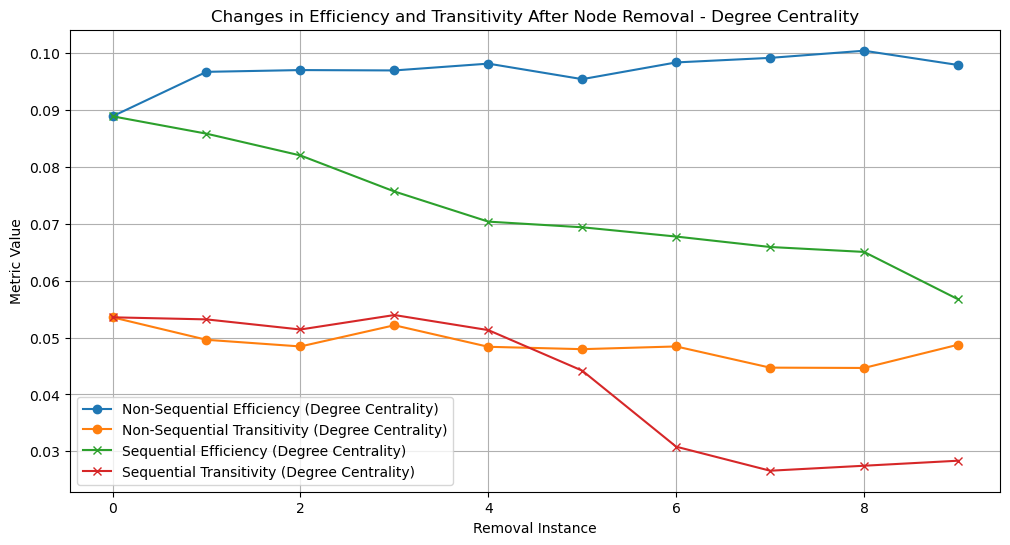

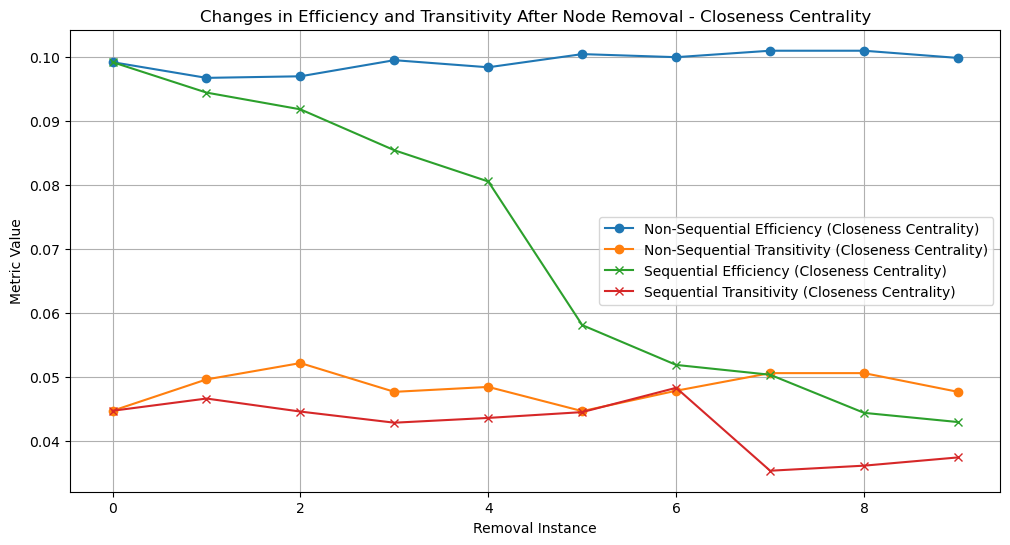

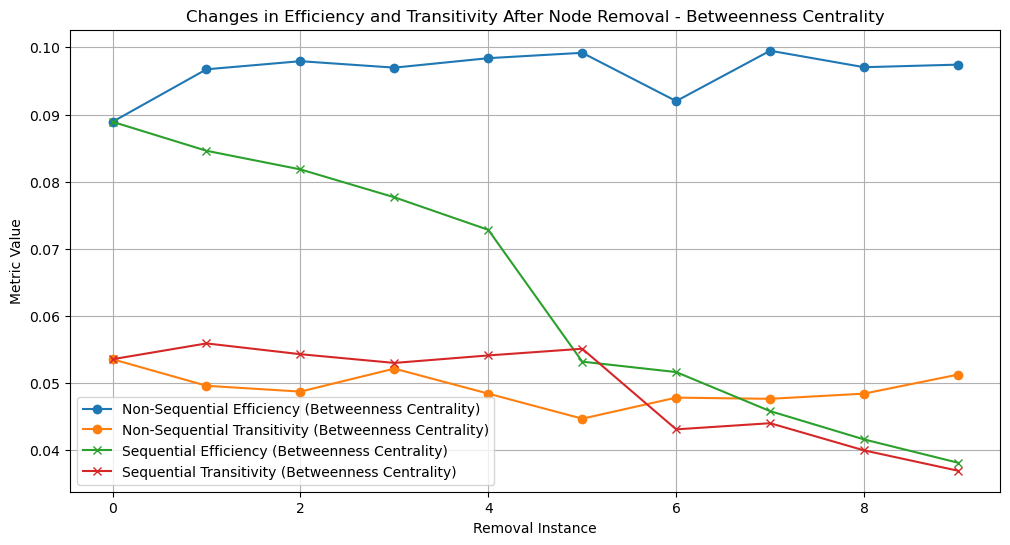

In [10]:
import matplotlib.pyplot as plt

def plot_metrics(df_non_sequential, df_sequential, centrality_type):
    plt.figure(figsize=(12, 6))
    
    # 绘制非顺序移除的效率和传递性
    plt.plot(df_non_sequential['Efficiency'], label=f'Non-Sequential Efficiency ({centrality_type})', marker='o')
    plt.plot(df_non_sequential['Transitivity'], label=f'Non-Sequential Transitivity ({centrality_type})', marker='o')
    
    # 绘制顺序移除的效率和传递性
    plt.plot(df_sequential['Efficiency'], label=f'Sequential Efficiency ({centrality_type})', marker='x')
    plt.plot(df_sequential['Transitivity'], label=f'Sequential Transitivity ({centrality_type})', marker='x')
    
    plt.title(f'Changes in Efficiency and Transitivity After Node Removal - {centrality_type}')
    plt.xlabel('Removal Instance')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# 绘制每种中心性的图表
plot_metrics(df_degree_non_sequential, df_degree_sequential, 'Degree Centrality')
plot_metrics(df_closeness_non_sequential, df_closeness_sequential, 'Closeness Centrality')
plot_metrics(df_betweenness_non_sequential, df_betweenness_sequential, 'Betweenness Centrality')


In [11]:
## II. Flows: weighted network

In [12]:
## II.1 Recompute the ranking of the 10 most important nodes

import networkx as nx
import pandas as pd

# 读取有向图
G = nx.read_graphml('london.graph')

# Ensure the graph is directed，如果不是 则转为有向图
if not G.is_directed():
    G = G.to_directed()

# Load the flows data（读取流量数据）
flows = pd.read_csv('london_flows.csv')

# 初始化每条边的总流量
for u, v in G.edges():
    G[u][v]['total_flow'] = 0  # 确保每条边都有total_flow属性，并初始化为0

# 为由有向边赋予权重，检查是否存在从O到D的边，存在则将flow设为权重。
for index, row in flows.iterrows():
    origin, destination, flow = row['station_origin'], row['station_destination'], row['flows']
   # 使用Dijkstra算法找到最短路径
    if nx.has_path(G, origin, destination):
        try:
            path = nx.shortest_path(G, source=origin, target=destination, weight='weight')  # 假设权重表示距离或成本
            for i in range(len(path) - 1):
                G[path[i]][path[i+1]]['total_flow'] += flow  # 将流量加到路径的每一条边上
        except nx.NetworkXNoPath:
            print(f"No path could be found between {origin} and {destination}")
        except KeyError:
            print(f"One of the nodes {origin} or {destination} does not exist in the graph")
    else:
        print(f"No path exists between {origin} and {destination}")
        # 此时G中的每条边的total_flow属性包含了通过该边的总流量

# 重写入度和出度中心性的计算，考虑权重
def weighted_degree_centrality(G, weight='total_flow', mode='in'):
    if mode == 'in':
        node_strength = {n: sum(data[weight] for _, _, data in G.in_edges(n, data=True) if weight in data) for n in G}
    else:
        node_strength = {n: sum(data[weight] for _, _, data in G.out_edges(n, data=True) if weight in data) for n in G}
    max_strength = max(node_strength.values())
    return {n: strength / max_strength for n, strength in node_strength.items()}

# 自定义的接近中心性计算函数，使用流量的逆值作为路径长度
def custom_closeness_centrality(G):
    closeness = {}
    for node in G.nodes():
        path_length_dict = nx.single_source_dijkstra_path_length(G, node, weight='total_flow')
        total_weighted_path_length = sum(1.0 / path_length_dict[n] if path_length_dict[n] > 0 else float('inf') for n in path_length_dict if n != node)
        if total_weighted_path_length > 0:
            closeness[node] = len(path_length_dict) / total_weighted_path_length
        else:
            closeness[node] = 0
    return closeness

# Compute centrality measures for the directed network
in_degree_centrality = weighted_degree_centrality(G, mode='in')
out_degree_centrality = weighted_degree_centrality(G, mode='out')
closeness_centrality = custom_closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='total_flow')

# Function to get the top 10 nodes from a centrality dictionary
def get_top_10(centrality_dict):
    return sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)[:10]

# Get the top 10 nodes for each centrality measure
top_10_in_degree = get_top_10(in_degree_centrality)
top_10_out_degree = get_top_10(out_degree_centrality)
top_10_closeness = get_top_10(closeness_centrality)
top_10_betweenness = get_top_10(betweenness_centrality)

# Print the top 10 nodes
print("Top 10 by In-Degree Centrality:", top_10_in_degree)
print("Top 10 by Out-Degree Centrality:", top_10_out_degree)
print("Top 10 by Closeness Centrality:", top_10_closeness)
print("Top 10 by Betweenness Centrality:", top_10_betweenness)


Top 10 by In-Degree Centrality: [('Green Park', 1.0), ('Bank and Monument', 0.8797232209483753), ('Waterloo', 0.7387639915880877), ('Westminster', 0.6679872464554644), ("King's Cross St. Pancras", 0.6160124821925242), ('Liverpool Street', 0.60624380978224), ('Stratford', 0.5176717997422156), ('Euston', 0.4915297469642494), ('Oxford Circus', 0.47959297198290485), ('Victoria', 0.473417000203514)]
Top 10 by Out-Degree Centrality: [('Green Park', 1.0), ('Waterloo', 0.919502554989719), ('Bank and Monument', 0.8002192899542516), ('Westminster', 0.6753868839013835), ("King's Cross St. Pancras", 0.6456344139810434), ('Stratford', 0.5646047400367035), ('Liverpool Street', 0.5635431905234166), ('Euston', 0.5297190238397845), ('Victoria', 0.5198160756404925), ('Bond Street', 0.44581007861283106)]
Top 10 by Closeness Centrality: [('Morden', 353282.8856050111), ('Tooting Bec', 264559.73406834743), ('Balham', 257581.38844520287), ('Clapham South', 242719.79836381314), ('Tooting Broadway', 238816.097

In [13]:
## II.2 Recompute the impact of weighted-node removal

def calculate_new_weights(G, alpha=0.5, epsilon=1e-10):
    for u, v, data in G.edges(data=True):
        original_weight = data.get('weight', 1)
        flow = data.get('total_flow', 1)
         # 使用流量的逆来调整权重，使得流量较高的边权重更小（权重越小意味着越重要）
        new_weight = original_weight * (1 + 1 / (flow + epsilon))
        G[u][v]['new_weight'] = new_weight

def weighted_global_efficiency(G, weight='new_weight'):
    n = len(G)
    total_efficiency = 0.0
    path_lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight=weight))

    for i, targets in path_lengths.items():
        for j, d in targets.items():
            if i != j and d < float('inf'):
                total_efficiency += 1.0 / d

    # Calculate the average efficiency
    global_efficiency = total_efficiency / (n * (n - 1))
    return global_efficiency

calculate_new_weights(G)  # 计算新的权重
efficiency = weighted_global_efficiency(G)  # 计算全局效率
print("Optimized Weighted Global Efficiency:", efficiency)


def calculate_weighted_global_clustering_coefficient(G):
    # 为每个节点计算加权集聚系数。这里使用了NetworkX库的clustering函数，它可以接受一个权重参数，这个权重定义了边的强度。在这个函数中，权重越大，表示连接越“紧密”。
    clustering_coefficients = nx.clustering(G, weight='total_flow')

    # 计算所有节点的集聚系数的平均值，得到全局集聚系数。这是通过将所有节点的集聚系数相加，然后除以节点的数量得到的。
    weighted_global_clustering = sum(clustering_coefficients.values()) / len(clustering_coefficients)
    return weighted_global_clustering

# G is directed graph with appropriate weights
weighted_global_clustering = calculate_weighted_global_clustering_coefficient(G)
print("Weighted Global Clustering Coefficient:", weighted_global_clustering)


Optimized Weighted Global Efficiency: 0.09970804013806502
Weighted Global Clustering Coefficient: 0.0012446473081638618


In [14]:
##检查london graph的节点、边、权重基本信息

# 检查图的类型
print("Graph type:", type(G))

# 检查图是否是有向图
print("Is the graph directed?", G.is_directed())

# 打印图中的节点和边的数量
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# 打印前几条边和它们的总流量
print("Sample edges with total flows:")
for u, v, data in list(G.edges(data=True))[:10]:  # 打印前10条边的信息
    print(u, v, {'total_flow': data.get('total_flow', 'No flow data')})

# 如果您想查看是否所有边都有total_flow属性，可以添加一个检查
if all('total_flow' in data for _, _, data in G.edges(data=True)):
    print("All edges have a total_flow attribute.")
else:
    print("Some edges are missing a total_flow attribute.")

# 统计total_flow的基本信息
flows = [data['total_flow'] for _, _, data in G.edges(data=True) if 'total_flow' in data]
if flows:
    print("Minimum total_flow:", min(flows))
    print("Maximum total_flow:", max(flows))
    print("Average total_flow:", sum(flows) / len(flows))
else:
    print("No total_flow found on any edges.")


Graph type: <class 'networkx.classes.digraph.DiGraph'>
Is the graph directed? True
Number of nodes: 401
Number of edges: 934
Sample edges with total flows:
Wembley Park Kingsbury {'total_flow': 2367}
Wembley Park Neasden {'total_flow': 1734}
Wembley Park Preston Road {'total_flow': 6728}
Wembley Park Finchley Road {'total_flow': 45280}
Kingsbury Wembley Park {'total_flow': 9989}
Kingsbury Queensbury {'total_flow': 1753}
Queensbury Kingsbury {'total_flow': 7666}
Queensbury Canons Park {'total_flow': 1469}
Canons Park Queensbury {'total_flow': 4916}
Canons Park Stanmore {'total_flow': 983}
All edges have a total_flow attribute.
Minimum total_flow: 0
Maximum total_flow: 133765
Average total_flow: 10632.598501070664


In [15]:
# 函数执行节点移除并重新计算度量
def remove_nodes_and_recompute_measures(G, nodes_to_remove):
    # 创建网络副本
    H = G.copy()
    # 移除指定节点
    H.remove_nodes_from(nodes_to_remove)
    # 重新计算权重
    calculate_new_weights(H)
    # 计算全局效率
    efficiency = weighted_global_efficiency(H)
    # 计算全局集聚系数
    clustering_coefficient = calculate_weighted_global_clustering_coefficient(H)
    print(f"After removing {nodes_to_remove}, Optimized Weighted Global Efficiency: {efficiency}")
    print(f"After removing {nodes_to_remove}, Weighted Global Clustering Coefficient: {clustering_coefficient}")

# 第一次实验：移除度中心性前三名的站点
remove_nodes_and_recompute_measures(G, ['Stratford', 'Bank and Monument', 'Baker Street'])

# 第二次实验：移除加权后入度和出度中心性前三名的站点
remove_nodes_and_recompute_measures(G, ['Green Park', 'Bank and Monument', 'Waterloo'])

After removing ['Stratford', 'Bank and Monument', 'Baker Street'], Optimized Weighted Global Efficiency: 0.08071699123137402
After removing ['Stratford', 'Bank and Monument', 'Baker Street'], Weighted Global Clustering Coefficient: 0.0011471777835722564
After removing ['Green Park', 'Bank and Monument', 'Waterloo'], Optimized Weighted Global Efficiency: 0.09209444542981117
After removing ['Green Park', 'Bank and Monument', 'Waterloo'], Weighted Global Clustering Coefficient: 0.0006365153998435967


In [16]:
## Part B spatial interaction model

import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [17]:
# 检查数据中是否含有NaN，并考虑填充或删除这些行
data = pd.read_csv('london_flows_forP2.csv')
print(data.isnull().sum())  # 打印各列的缺失值数量

station_origin         0
station_destination    0
flows                  0
population             0
jobs                   0
distance               0
dtype: int64


In [22]:
import pandas as pd
from scipy.optimize import differential_evolution
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('london_flows_forP2.csv')

# 指数衰减函数
def exp_decay(distance, beta):
    return np.exp(-beta * distance)

# 定义目标函数
def objective(beta):
    error = 0
    for _, row in data.iterrows():
        predicted = row['population'] * row['jobs'] * exp_decay(row['distance'], beta[0])
        actual = row['flows']
        error += (predicted - actual) ** 2
    return error


# 使用BFGS优化方法优化参数
def optimize_parameters():
    initial_beta = [0.01]  # 初始beta值
    result = minimize(objective, initial_beta, method='BFGS', options={'disp': True})
    return result.x[0], result.fun
    
# 执行优化
optimal_beta, minimal_error = optimize_parameters()

print(f"Optimal beta: {optimal_beta}, Minimal Error: {minimal_error}")

Optimization terminated successfully.
         Current function value: 1100355101.000000
         Iterations: 1
         Function evaluations: 4
         Gradient evaluations: 2
Optimal beta: 1.02, Minimal Error: 1100355101.0
